# Analyse und Visualisierung von Trinkbrunnen in Zürich

In [2]:
# Import der notwendigen Bibliotheken
from pandas import json_normalize
import requests
import json
import folium
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import os
import platform
from platform import python_version
from datetime import datetime

# Overpass API URL
url = 'http://overpass-api.de/api/interpreter'

# Overpass-Abfrage für Trinkbrunnen in Zürich
query = """
    [out:json][timeout:25];
    area["name"="Zürich"]["boundary"="administrative"]["admin_level"="8"];
    node["amenity"="drinking_water"](area);
    out geom;
"""

# API-Anfrage für Trinkbrunnen-Daten
response = requests.get(url, params={'data': query})
if response.status_code == 200:
    data = response.json()['elements']
else:
    print("Fehler bei der API-Anfrage:", response.status_code)
    data = []

# Daten in DataFrame umwandeln
df = json_normalize(data)

# Überprüfung der ersten paar Zeilen des DataFrames
df.head()

,type,id,lat,lon,tags.amenity,tags.bottle,tags.dog,tags.drinking_water:description,tags.fountain,tags.material,...,tags.artwork_subject,tags.artwork_type,tags.disused,tags.supervised,tags.loc_name,tags.survey:date,tags.covered,tags.pump,tags.ele,tags.not:operator:wikidata
0,node,60030906,47.413534,8.541278,drinking_water,yes,yes,Quellwasser,bubbler,metal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,60733338,47.402830,8.499940,drinking_water,yes,no,Leitungswasser,drinking,stone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,60733384,47.402164,8.499442,drinking_water,yes,no,Leitungswasser,drinking,stone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,60734353,47.407291,8.550476,drinking_water,NaN,NaN,Quellwasser,bubbler,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,61263856,47.405301,8.503774,drinking_water,NaN,NaN,Leitungswasser,drinking,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Entfernen von Zeilen ohne Koordinaten
df = df.dropna(subset=['lat', 'lon'])

# Karte erstellen, zentriert auf Zürich
map = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=13, control_scale=True)

# Hinzufügen der Trinkbrunnen als Marker auf der Karte
for i, row in df.iterrows():
    folium.Marker(location=(row['lat'], row['lon']),
                  popup=row.get('tags.name', 'Trinkbrunnen ohne Namen')).add_to(map)

# Anzeige der Karte
map

Anzahl der Trinkbrunnen in Zürich: 940
Durchschnittliche Entfernung zwischen den Trinkbrunnen: 3965.62 Meter


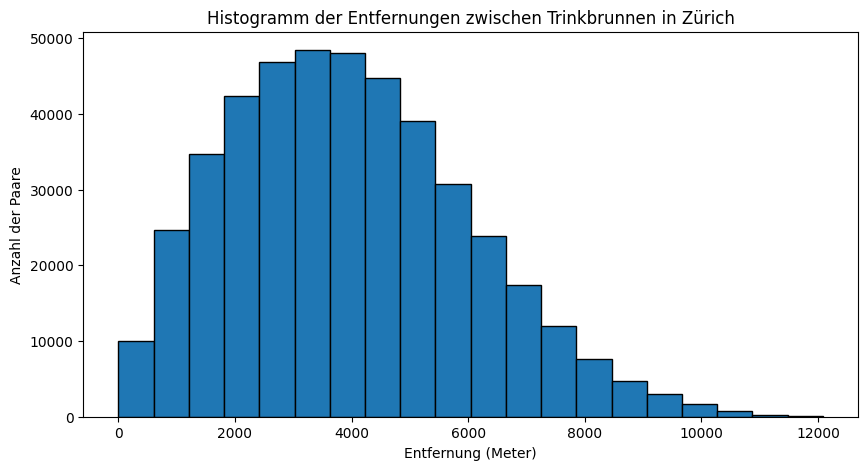

In [4]:
# Anzahl der Trinkbrunnen in Zürich
total_fountains = len(df)
print(f"Anzahl der Trinkbrunnen in Zürich: {total_fountains}")

# Berechnung der Entfernungen zwischen den Trinkbrunnen
distances = []
for i in range(len(df)):
    for j in range(i+1, len(df)):
        loc1 = (df.iloc[i]['lat'], df.iloc[i]['lon'])
        loc2 = (df.iloc[j]['lat'], df.iloc[j]['lon'])
        distances.append(geodesic(loc1, loc2).meters)

# Berechnung der durchschnittlichen Entfernung zwischen Trinkbrunnen
avg_distance = sum(distances) / len(distances) if distances else 0
print(f"Durchschnittliche Entfernung zwischen den Trinkbrunnen: {avg_distance:.2f} Meter")

# Histogramm der Entfernungen
plt.figure(figsize=(10, 5))
plt.hist(distances, bins=20, edgecolor='black')
plt.title("Histogramm der Entfernungen zwischen Trinkbrunnen in Zürich")
plt.xlabel("Entfernung (Meter)")
plt.ylabel("Anzahl der Paare")
plt.show()

In [5]:
# Systeminfo für das Jupyter Notebook
print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-09 19:17:48
Python Version: 3.11.10
-----------------------------------
